## Shainan Agrawal
### Date: 11/21/2020

### Retrieve employee datafrom web API


In [ ]:
get_employee_data()
display_employee_data()
add_employee_data()
calculate_bonus()-----display_salary()
average_salary()

In [1]:
"""Access JSON data stream from a Web API to extract monthly stock data in Python dictionary"""

import json
import requests

url_string = "http://dummy.restapiexample.com/api/v1/employees"
url_response = requests.get(url_string)
employee_data_json_stream = json.loads(url_response.text)
employee_data = employee_data_json_stream['data']

In [2]:
import pandas as pd
employee_df = pd.DataFrame(employee_data)
employee_df.drop('profile_image',axis=1,inplace=True)
employee_df['employee_salary'] = employee_df['employee_salary'].astype(float)
employee_df['employee_age'] = employee_df['employee_age'].astype(int)

In [44]:
display(employee_df.dtypes)

id                  object
employee_name       object
employee_salary    float64
employee_age         int64
senior_mgmt           bool
department          object
gender              object
Bonus              float64
dtype: object

In [5]:
additional_data_df = pd.read_csv('/Users/cis_developer/CIS5357Fall2020/AdditionalData.csv',header=0)
additional_data_df.drop('id',axis=1,inplace=True)

In [6]:
additional_data_df

,senior_mgmt,department,gender
0,True,Marketing,Male
1,True,Marketing,Male
2,False,Finance,Male
3,True,Finance,Male
4,True,Client Services,Female
5,False,Legal,Female
6,True,Product,Male
7,True,Finance,Female
8,True,Engineering,Female
9,True,Business Development,Female


In [7]:
employee_df = pd.concat([employee_df, additional_data_df], axis=1)

In [8]:
employee_df

,id,employee_name,employee_salary,employee_age,senior_mgmt,department,gender
0,1,Tiger Nixon,320800.0,61,True,Marketing,Male
1,2,Garrett Winters,170750.0,63,True,Marketing,Male
2,3,Ashton Cox,86000.0,66,False,Finance,Male
3,4,Cedric Kelly,433060.0,22,True,Finance,Male
4,5,Airi Satou,162700.0,33,True,Client Services,Female
5,6,Brielle Williamson,372000.0,61,False,Legal,Female
6,7,Herrod Chandler,137500.0,59,True,Product,Male
7,8,Rhona Davidson,327900.0,55,True,Finance,Female
8,9,Colleen Hurst,205500.0,39,True,Engineering,Female
9,10,Sonya Frost,103600.0,23,True,Business Development,Female


In [9]:
bonus = int(input('Please enter the bonus percantage value: '))

Please enter the bonus percantage value: 8


In [10]:
bonus_amount = (bonus * employee_df['employee_salary'])/100

employee_df['Bonus'] = bonus_amount

In [11]:
bonus_amount

0     25664.0
1     13660.0
2      6880.0
3     34644.8
4     13016.0
5     29760.0
6     11000.0
7     26232.0
8     16440.0
9      8288.0
10     7244.8
11    27360.0
12    37648.0
13    25080.0
14    30860.0
15    15880.0
16    58000.0
17    19000.0
18    10560.0
19    17400.0
20    27600.0
21    54000.0
22     8516.0
23     6848.0
Name: employee_salary, dtype: float64

In [12]:
cols = ['employee_name', 'employee_salary','gender','Bonus']
less_paid_employee_df = employee_df[employee_df['employee_salary']<100000]
less_paid_employee_df = less_paid_employee_df[cols]

In [13]:
less_paid_employee_df

,employee_name,employee_salary,gender,Bonus
2,Ashton Cox,86000.0,Male,6880.0
10,Jena Gaines,90560.0,Female,7244.8
23,Doris Wilder,85600.0,Female,6848.0


In [14]:
cols = ['employee_name','department','employee_age']
young_clientservice_employee_df = employee_df[(employee_df['employee_age']<40) & (employee_df['department']=='Client Services')]
young_clientservice_employee_df = young_clientservice_employee_df[cols]

In [15]:
young_clientservice_employee_df

,employee_name,department,employee_age
4,Airi Satou,Client Services,33
22,Caesar Vance,Client Services,21
23,Doris Wilder,Client Services,23


In [16]:
employee_df

,id,employee_name,employee_salary,employee_age,senior_mgmt,department,gender,Bonus
0,1,Tiger Nixon,320800.0,61,True,Marketing,Male,25664.0
1,2,Garrett Winters,170750.0,63,True,Marketing,Male,13660.0
2,3,Ashton Cox,86000.0,66,False,Finance,Male,6880.0
3,4,Cedric Kelly,433060.0,22,True,Finance,Male,34644.8
4,5,Airi Satou,162700.0,33,True,Client Services,Female,13016.0
5,6,Brielle Williamson,372000.0,61,False,Legal,Female,29760.0
6,7,Herrod Chandler,137500.0,59,True,Product,Male,11000.0
7,8,Rhona Davidson,327900.0,55,True,Finance,Female,26232.0
8,9,Colleen Hurst,205500.0,39,True,Engineering,Female,16440.0
9,10,Sonya Frost,103600.0,23,True,Business Development,Female,8288.0


In [26]:
dept_average_salary = employee_df[['department','employee_salary']].groupby('department').mean()

In [27]:
dept_average_salary

,employee_salary
department,
Business Development,103600.0
Client Services,121687.5
Engineering,205500.0
Finance,308177.5
Human Resources,428720.0
Legal,353000.0
Marketing,388850.0
Product,197750.0
Sales,313500.0


In [30]:
gender_average_salary = employee_df[['gender','employee_salary']].groupby('gender').mean()

In [31]:
gender_average_salary

,employee_salary
gender,
Female,255208.461538
Male,302460.000000


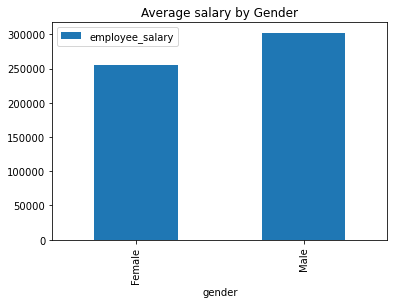

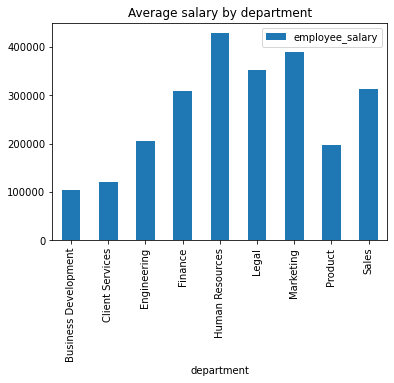

In [45]:
plot_gender_average_salary = pd.DataFrame(gender_average_salary)
plot_gender_average_salary.plot(kind="bar",title="Average salary by Gender");
plot_dept_average_salary= pd.DataFrame(dept_average_salary)
plot_dept_average_salary.plot(kind="bar",title="Average salary by department");

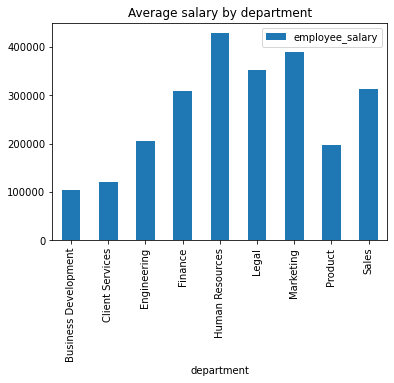

In [41]:
plot_dept_average_salary= pd.DataFrame(dept_average_salary)
plot_dept_average_salary.plot(kind="bar",title="Average salary by department");